In [8]:
import librosa
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
class SoundClassifier:
    def __init__(self, filepaths):
        self.filepaths = filepaths

    def analyze_audio(self):
        features_list = []
        for filepath in self.filepaths:
            y, sr = librosa.load(filepath)

            spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
            spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])
            zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y)[0])

            features_list.append([spectral_centroid, spectral_bandwidth, zero_crossing_rate])

        return np.array(features_list)
    
    def classify_sound(self):
        features = self.analyze_audio()

        kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
        kmeans.fit(features)

        cluster_labels = kmeans.predict(features)

        for i, label in enumerate(cluster_labels):
            if label == 0:
                print(f"Audio file {self.filepaths[i]} is classified as Cluster 0 (Shrill)")
            else:
                print(f"Audio file {self.filepaths[i]} is classified as Cluster 1 (Soft)")
                
file_paths = ["output.wav", "output_0.wav", "output_1.wav", "output_2.wav", "output_3.wav", "output_4.wav", "output_5.wav", "output_6.wav", "output_7.wav"]
classifier = SoundClassifier(file_paths)
classifier.classify_sound()

Audio file output.wav is classified as Cluster 0 (Shrill)
Audio file output_0.wav is classified as Cluster 0 (Shrill)
Audio file output_1.wav is classified as Cluster 0 (Shrill)
Audio file output_2.wav is classified as Cluster 1 (Soft)
Audio file output_3.wav is classified as Cluster 1 (Soft)
Audio file output_4.wav is classified as Cluster 1 (Soft)
Audio file output_5.wav is classified as Cluster 0 (Shrill)
Audio file output_6.wav is classified as Cluster 0 (Shrill)
Audio file output_7.wav is classified as Cluster 1 (Soft)


In [27]:
class SoundClassifier:
    def __init__(self, filepaths):
        self.filepaths = filepaths

    def analyze_audio(self):
        features_list = []
        for filepath in self.filepaths:
            y, sr = librosa.load(filepath)

            spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
            spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])
            zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y)[0])

            features_list.append([spectral_centroid, spectral_bandwidth, zero_crossing_rate])

        return np.array(features_list)
    def classify_sound(self):
        extracted_audio = self.extract_audio()
        features = self.analyze_audio(extracted_audio)
        return features
    def plot_clusters(self):
        features = self.analyze_audio()
        pca = PCA(n_components=2)
        features_pca = pca.fit_transform(features)
        kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
        kmeans.fit(features_pca)

        plt.figure(figsize=(8, 6))
        for i in range(len(self.filepaths)):
            label = 'Soft' if kmeans.labels_[i] == 0 else 'Shrill'
            color = 'blue' if label == 'Soft' else 'red'
            plt.scatter(features_pca[i, 0], features_pca[i, 1], c=color, label=label)

        plt.title('Clusters of Audio Files')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', label='Soft', markerfacecolor='blue', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='Shrill', markerfacecolor='red', markersize=10)
        ]
        plt.legend(handles=legend_elements, loc='best')
        plt.show()

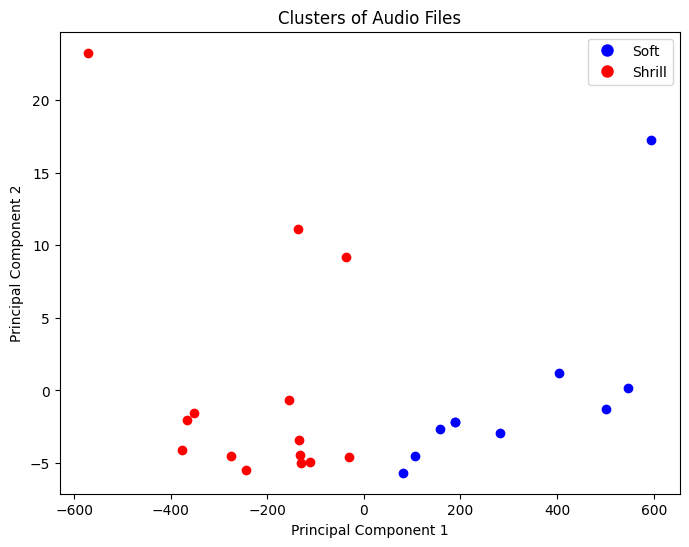

In [28]:
file_paths = ["output.wav", "output_0.wav", "output_1.wav", "output_2.wav", "output_3.wav", "output_4.wav", "output_5.wav", "output_6.wav", "output_7.wav","output_8.wav","output_9.wav","output_10.wav","output_11.wav","output_12.wav","output_13.wav","output_14.wav","output_15.wav","output_16.wav","output_17.wav","output_18.wav","output_19.wav","output_20.wav","output_21.wav","output_22.wav"] 
classifier = SoundClassifier(file_paths)
classifier.plot_clusters()